<a href="https://colab.research.google.com/github/pranitakhade/Industrial-Copper/blob/main/Industrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install streamlit_option_menu

In [1]:
import streamlit as st
import streamlit_option_menu
from pyngrok import ngrok
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_excel('/content/Copper_Set.xlsx')
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
data.shape

(181673, 14)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
data.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [ ]:
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y-%m-%d').dt.date
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y-%m-%d').dt.date

In [ ]:
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce', downcast='integer')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce', downcast='integer')
data['country'] = pd.to_numeric(data['country'], errors='coerce', downcast='integer')
data['application'] = pd.to_numeric(data['application'], errors='coerce', downcast='integer')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce', downcast='integer')
data['width'] = pd.to_numeric(data['width'], errors='coerce', downcast='integer')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce', downcast='integer')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce', downcast='integer')

In [ ]:
data['material_ref'] = data['material_ref'].astype('str')

In [ ]:
data = data[data['status'].isin(['Won', 'Lost'])]

In [ ]:
data.isnull().sum()

id               1
item_date        1
quantity tons    1
customer         1
country          4
status           0
item type        0
application      3
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    1
selling_price    1
dtype: int64

In [ ]:
# Replace missing values with appropriate imputation method
data['quantity tons'].fillna(data['quantity tons'].median(), inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)  # Mode for categorical data
data['application'].fillna(data['application'].mode()[0], inplace=True)
data['material_ref'].fillna(data['material_ref'].mode()[0], inplace=True)  # Mode for categorical data
data['thickness'].fillna(data['thickness'].median(), inplace=True)
data['selling_price'].fillna(data['selling_price'].median(), inplace=True)

In [ ]:
data.loc[data['selling_price'] <= 0,'selling_price'] = np.nan
data.loc[data['quantity tons'] <= 0,'quantity tons'] = np.nan
data.loc[data['thickness'] <= 0,'thickness'] = np.nan

In [ ]:
data.dropna(inplace = True)

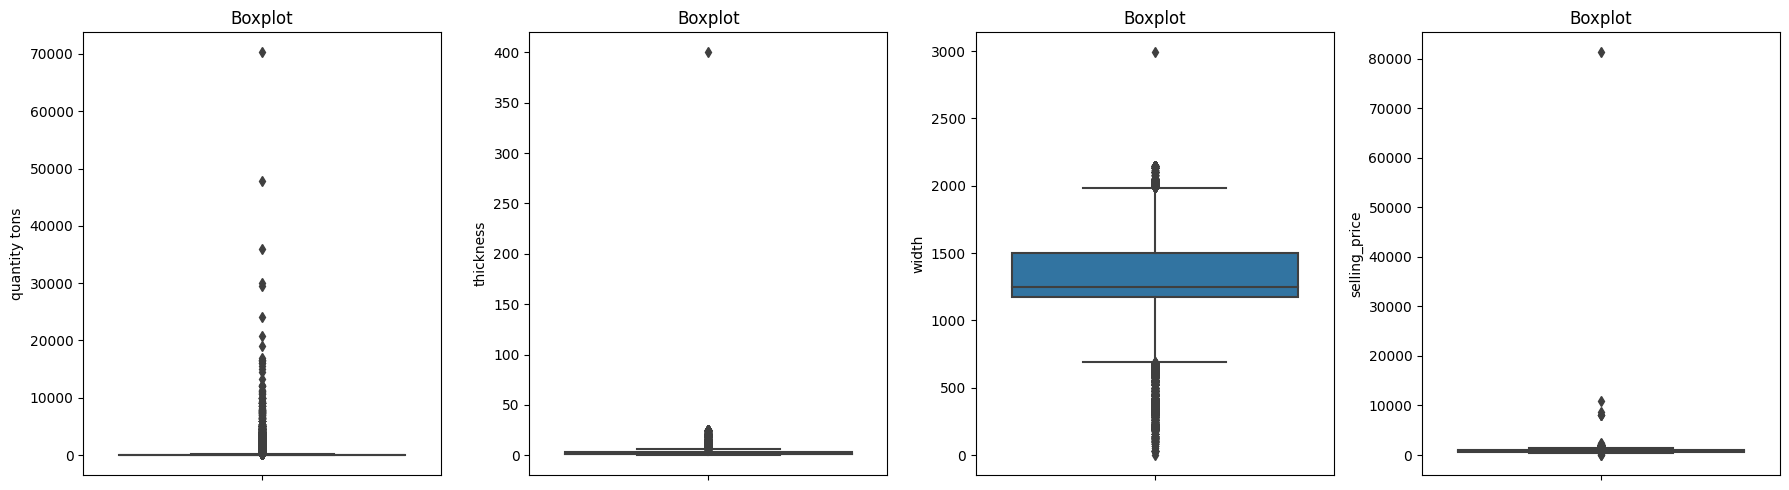

<ipython-input-20-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-20-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-20-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be rem

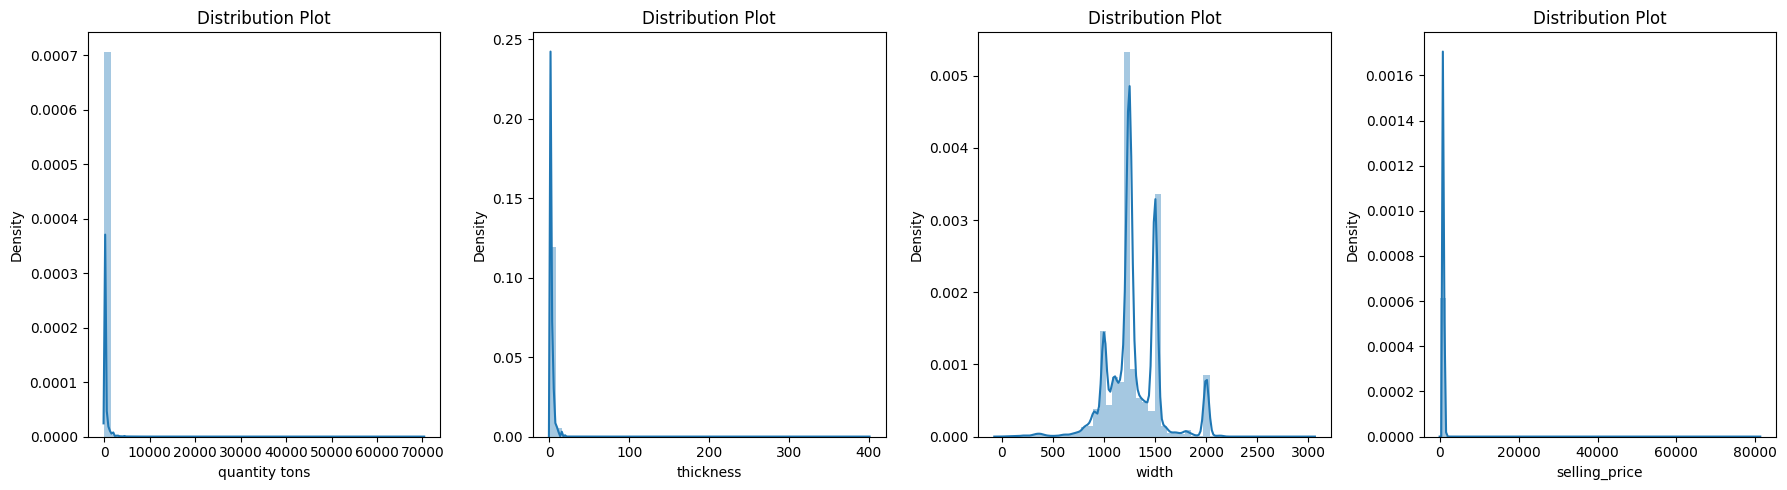

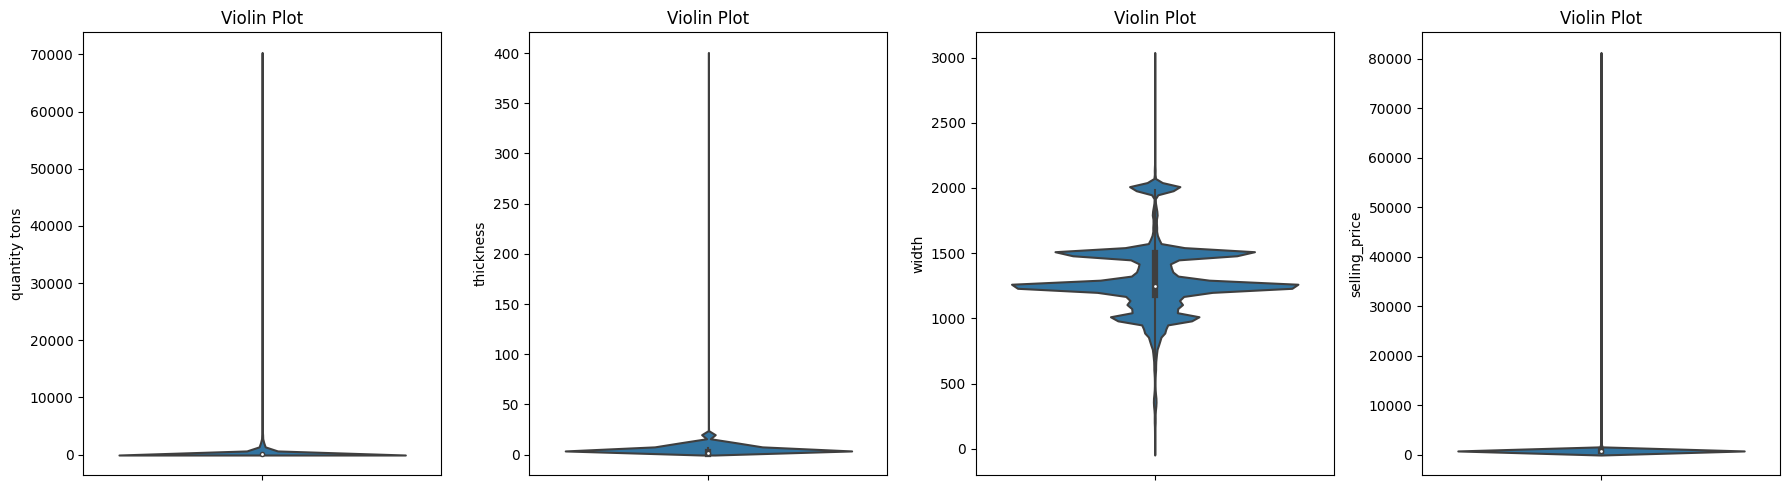

In [ ]:
a = ['quantity tons', 'thickness', 'width', 'selling_price']
plot_types = ['Boxplot', 'Distribution Plot', 'Violin Plot']

data1 = data

# Loop through each plot type
for plot_type in plot_types:
    plt.figure(figsize=(18, 5))

    for index, column in enumerate(a, 1):
        # Create a subplot for each column
        plt.subplot(1, len(a), index)

        if plot_type == 'Boxplot':
            # Boxplot to visualize outliers
            sns.boxplot(data=data1, y=column)
        elif plot_type == 'Distribution Plot':
            # Distribution plot to visualize skewness
            sns.distplot(data1[column])
        elif plot_type == 'Violin Plot':
            # Violinplot to visualize distribution and outliers
            sns.violinplot(data=data1, y=column)

        plt.title(plot_type)

    plt.tight_layout()
    plt.show()


In [ ]:
positively_skewed_vars = ['quantity tons', 'thickness', 'selling_price']  #customer
for var in positively_skewed_vars:
    data[var] = np.log1p(data[var])  # log1p(x) = log(x + 1) to handle zeros

In [ ]:
continuous_vars = ['quantity tons', 'thickness', 'width', 'selling_price']

for column in continuous_vars:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                                    np.where(data[column] > upper_bound, upper_bound, data[column]))

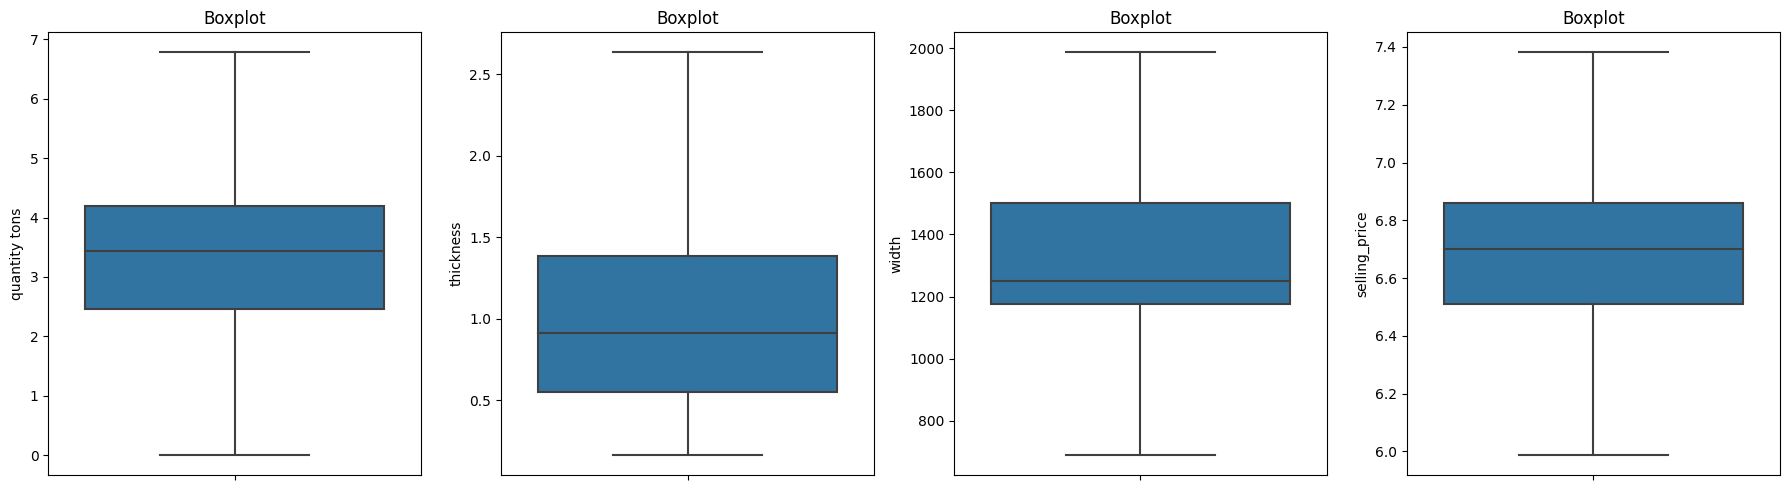

<ipython-input-23-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-23-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-23-3d951177f445>:19: UserWarning: 

`distplot` is a deprecated function and will be rem

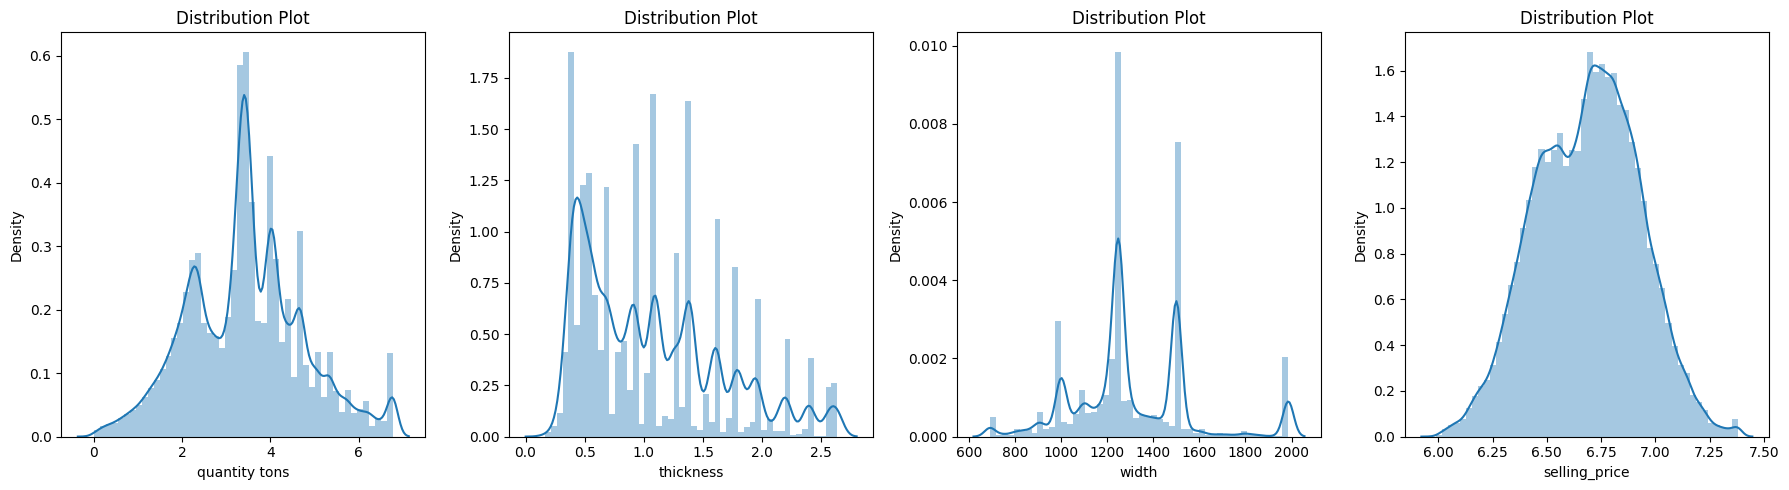

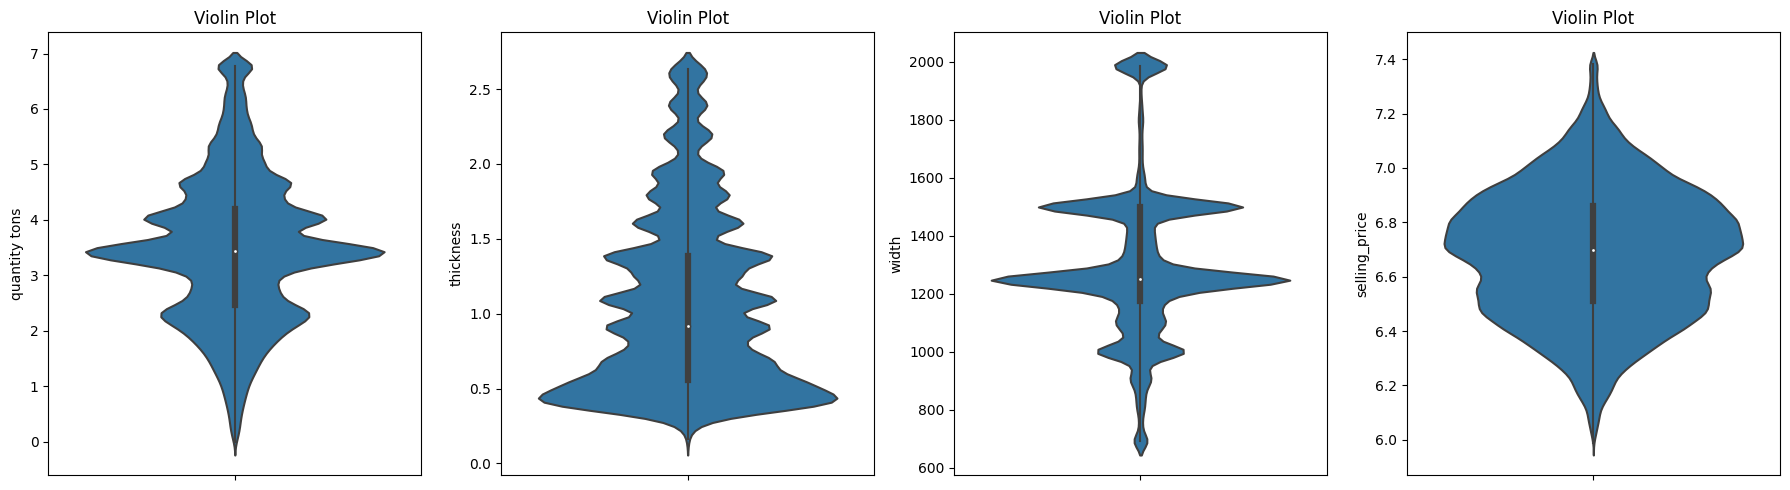

In [ ]:
a = ['quantity tons', 'thickness', 'width', 'selling_price']
plot_types = ['Boxplot', 'Distribution Plot', 'Violin Plot']

data1 = data

# Loop through each plot type
for plot_type in plot_types:
    plt.figure(figsize=(18, 5))

    for index, column in enumerate(a, 1):
        # Create a subplot for each column
        plt.subplot(1, len(a), index)

        if plot_type == 'Boxplot':
            # Boxplot to visualize outliers
            sns.boxplot(data=data1, y=column)
        elif plot_type == 'Distribution Plot':
            # Distribution plot to visualize skewness
            sns.distplot(data1[column])
        elif plot_type == 'Violin Plot':
            # Violinplot to visualize distribution and outliers
            sns.violinplot(data=data1, y=column)

        plt.title(plot_type)

    plt.tight_layout()
    plt.show()


In [ ]:
data.skew()

<ipython-input-24-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


quantity tons      0.193478
customer         223.884951
country            0.708191
application        0.751099
thickness          0.762262
width              0.657928
product_ref        1.013522
selling_price     -0.038189
dtype: float64

In [ ]:
data1 = data.copy()

##Encoding

In [ ]:
# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'status' column in your DataFrame
data1['status'] = label_encoder.fit_transform(data1['status'])

In [ ]:
# One-hot Encoding for 'item type'
data1 = pd.get_dummies(data1, columns=['item type'], drop_first=True)

In [ ]:
data1.drop(columns = ['id', 'item_date','material_ref', 'delivery date'],inplace = True)

##Heatmap

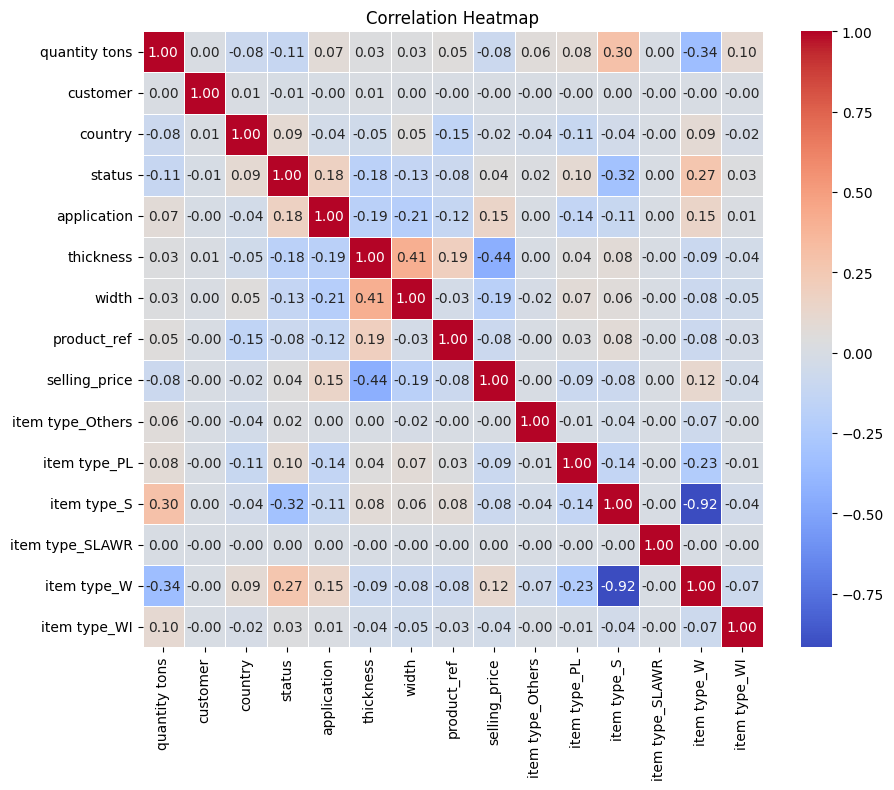

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# Identify and drop highly correlated columns
threshold = 0.7  # Define a correlation threshold
highly_correlated_cols = set()  # Initialize a set to store highly correlated column names

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

#Predict Selling Price

In [ ]:
# Separate features (X) and target variable (y) for regression
X_regression = data1.drop(columns=['selling_price','status'])  # Replace 'target_column' with your target variable
y_regression = data1['selling_price']

# Split the dataset into training and testing sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Define the models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Initialize dictionaries to store results
mae_results = {}
mse_results = {}
rmse_results = {}
r2_results = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_regression, y_train_regression)

    # Make predictions
    predictions = model.predict(X_test_regression)

    # Calculate MAE
    mae = mean_absolute_error(y_test_regression, predictions)
    mae_results[model_name] = mae

    # Calculate MSE
    mse = mean_squared_error(y_test_regression, predictions)
    mse_results[model_name] = mse

    # Calculate RMSE
    rmse = np.sqrt(mse)
    rmse_results[model_name] = rmse

    # Calculate R-squared
    r2 = r2_score(y_test_regression, predictions)
    r2_results[model_name] = r2

# Display the results
for model_name in models.keys():
    print(f"Results for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae_results[model_name]}")
    print(f"Mean Squared Error (MSE): {mse_results[model_name]}")
    print(f"Root Mean Squared Error (RMSE): {rmse_results[model_name]}")
    print(f"R-squared (R2): {r2_results[model_name]}")
    print()


Results for Decision Tree Regressor:
Mean Absolute Error (MAE): 0.1334428748034444
Mean Squared Error (MSE): 0.03634269187505823
Root Mean Squared Error (RMSE): 0.1906375930268168
R-squared (R2): 0.3553979350657852

Results for Random Forest Regressor:
Mean Absolute Error (MAE): 0.11167697148953873
Mean Squared Error (MSE): 0.021567003958216244
Root Mean Squared Error (RMSE): 0.14685708685050322
R-squared (R2): 0.6174709530679667

Results for XGBoost Regressor:
Mean Absolute Error (MAE): 0.1260640426380667
Mean Squared Error (MSE): 0.02329102209421396
Root Mean Squared Error (RMSE): 0.15261396428313487
R-squared (R2): 0.5868924352666796



In [ ]:
# Create a RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Fit the model to your entire dataset (X_regression and y_regression)
best_rf_model.fit(X_regression, y_regression)

RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=42)

In [ ]:
with open('RandomForestRegressor.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

In [ ]:
quantity_tons =  7.050764
customer = 30299962.0
country = 28.0
application = 10.0
thickness= 2.0
width = 1540.0
product_ref = 1670798778
item_type = 'IPL'

In [ ]:
# Prepare the new sample data for prediction
new_data = pd.DataFrame({
    'quantity tons': [np.log(float(quantity_tons))],
    'customer': [float(customer)],
    'country': [float(country)],
    'application': [float(application)],
    'thickness': [np.log(float(thickness))],
    'width': [float(width)],
    'product_ref': [int(product_ref)],
    'item type_Others': [0],   # Initialize all one-hot encoded categories to 0
    'item type_PL': [0],
    'item type_S': [0],
    'item type_SLAWR': [0],
    'item type_W': [0],
    'item type_WI': [0]
})

# Set the appropriate one-hot encoded category to 1 based on the selected 'item_type'
if item_type != 'IPL':
  new_data[f'item type_{item_type}'] = 1

# Use the trained model to make predictions on the new data
new_predictions = best_rf_model.predict(new_data)

original_value = np.exp(new_predictions[0])

formatted_original_value = '{:.2f}'.format(original_value)

# The variable 'new_predictions' now contains the predicted selling price for the new data.
print("Predicted Selling Price:", formatted_original_value)


Predicted Selling Price: 803.81


#Predict Status

                    Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Extra Trees Classifier  0.930171   0.951123  0.958707  0.954900  0.972670
1      XGBoost Classifier  0.899030   0.918438  0.953750  0.935761  0.952934
2     Logistic Regression  0.771072   0.771072  1.000000  0.870740  0.510777



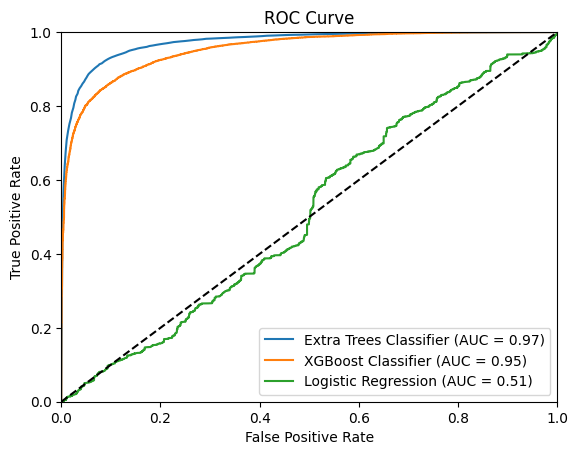

In [ ]:
# Assuming 'data' is your DataFrame and 'target_variable' is the column you want to predict
X_classification = data1.drop(columns=['status'])  # Features (all columns except the target)
y_classification = data1['status']  # Target variable


# Split the dataset into training and testing sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2,stratify = y_classification, random_state=42)


# Initialize and train different classification models
models = [
    ("Extra Trees Classifier", ExtraTreesClassifier(random_state=42)),
    ("XGBoost Classifier", XGBClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

results = []

for model_name, model in models:
    # Train the classifier
    model.fit(X_train_classification, y_train_classification)

    # Make predictions on the testing set
    y_pred_classification = model.predict(X_test_classification)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_classification, y_pred_classification)
    precision = precision_score(y_test_classification, y_pred_classification)
    recall = recall_score(y_test_classification, y_pred_classification)
    f1 = f1_score(y_test_classification, y_pred_classification)

    # Calculate ROC-AUC and plot ROC curve for models that support probability estimates
    if hasattr(model, "predict_proba"):
        y_prob_classification = model.predict_proba(X_test_classification)[:, 1]
        roc_auc = roc_auc_score(y_test_classification, y_prob_classification)
        fpr, tpr, _ = roc_curve(y_test_classification, y_prob_classification)

        # Plot ROC curve for the current model
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)
print()


# Display the ROC curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Create the Extra Trees Classifier with the best hyperparameters
best_extra_trees_classifier = ExtraTreesClassifier(
    max_depth=40,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=500,
    random_state=42  # Add a random state for reproducibility
)

# Fit the optimized model to the entire dataset
best_extra_trees_classifier.fit(X_classification, y_classification)

ExtraTreesClassifier(max_depth=40, n_estimators=500, random_state=42)

In [ ]:
with open('ExtraTreesClassifier.pkl', 'wb') as model_file:
    pickle.dump(best_extra_trees_classifier, model_file)

In [ ]:
cquantity_tons = 7.050764
ccustomer = 30299962.0
ccountry = 28.0
capplication = 10.0
cthickness= 2.0
cwidth = 1540.0
cproduct_ref = 1670798778
cselling = 803.81  #822.0
citem_type = 'IPL'

In [ ]:
# Prepare the new sample data for prediction
new_sample = pd.DataFrame({
    'quantity tons': [np.log(float(cquantity_tons))],
    'customer': [float(ccustomer)],
    'country': [float(ccountry)],
    'application': [float(capplication)],
    'thickness': [np.log(float(cthickness))],
    'width': [float(cwidth)],
    'product_ref': [int(cproduct_ref)],
    'selling_price': [np.log(float(cselling))],
    'item type_Others': [0],   # Initialize all one-hot encoded categories to 0
    'item type_PL': [0],
    'item type_S': [0],
    'item type_SLAWR': [0],
    'item type_W': [0],
    'item type_WI': [0]
})

# Set the appropriate one-hot encoded category to 1 based on the selected 'citem_type'
if citem_type != 'IPL':
  new_sample[f'item type_{citem_type}'] = 1

# Make predictions using the trained optimized Extra Trees Classifier
new_pred = best_extra_trees_classifier.predict(new_sample)

# Interpret the prediction
if new_pred[0] == 1:
    print('The Status is Won')
else:
    print('The Status is Lost')


The Status is Won


#Streamlit

In [ ]:
%%writefile app.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
import pickle

def load_model(model_path):
    with open(model_path, 'rb') as file:
        loaded_model = pickle.load(file)
    return loaded_model

def predict_selling_price(preprocessed_data, loaded_model):
    # Use the loaded model to make predictions
    predicted_price = loaded_model.predict(preprocessed_data)
    return predicted_price

def predict_status(preprocessed_data, loaded_model):
    # Use the loaded model to predict the status
    predicted_status = loaded_model.predict(preprocessed_data)
    return predicted_status

def main():
    st.set_page_config(layout="wide")
    st.title("Industrial Copper Modeling Application")

    tab1, tab2 = st.tabs(["PREDICT SELLING PRICE", "PREDICT STATUS"])


    with tab1:
        status_options = ['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
        item_type_options = ['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
        country_options = [28., 25., 30., 32., 38., 78., 27., 77., 113., 79., 26., 39., 40., 84., 80., 107., 89.]
        application_options = [10., 41., 28., 59., 15., 4., 38., 56., 42., 26., 27., 19., 20., 66., 29., 22., 40., 25., 67., 79., 3., 99., 2., 5., 39., 69., 70., 65., 58., 68.]
        product=['611112', '611728', '628112', '628117', '628377', '640400', '640405', '640665',
                     '611993', '929423819', '1282007633', '1332077137', '164141591', '164336407',
                     '164337175', '1665572032', '1665572374', '1665584320', '1665584642', '1665584662',
                     '1668701376', '1668701698', '1668701718', '1668701725', '1670798778', '1671863738',
                     '1671876026', '1690738206', '1690738219', '1693867550', '1693867563', '1721130331', '1722207579']

        # User input widgets
        with st.form("my_form"):
            col1, col2, col3 = st.columns([5, 2, 5])
            with col1:
                item_type = st.selectbox("Item Type", item_type_options, key=2)
                country = st.selectbox("Country", sorted(country_options), key=3)
                application = st.selectbox("Application", sorted(application_options), key=4)
                product_ref = st.selectbox("Product Reference", product, key=5)
            with col3:
                quantity_tons = st.text_input("Quantity Tons", placeholder="Min:1 & Max:1000000000.0")
                thickness = st.text_input("Thickness", placeholder="Min:0.18 & Max:400")
                width = st.text_input("Width", placeholder="Min:1, Max:2990")
                customer = st.text_input("Customer ID", placeholder="Min:12458.0, Max:2147483647.0")
                submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
                st.markdown(" ", unsafe_allow_html=True)

            flag = 0
            pattern = "^(?:\d+|\d*\.\d+)$"
            for i in [quantity_tons, thickness, width, customer]:
                if re.match(pattern, i):
                    pass
                else:
                    flag = 1
                    break

        if submit_button and flag == 1:
            if len(i) == 0:
                st.write("Please enter a valid number; spaces are not allowed")
            else:
                st.write("You have entered an invalid value: ", i)

        if submit_button and flag == 0:
            loaded_model = load_model("RandomForestRegressor.pkl")
            new_data = pd.DataFrame({
                        'quantity tons': [np.log(float(quantity_tons))],
                        'customer': [float(customer)],
                        'country': [float(country)],
                        'application': [float(application)],
                        'thickness': [np.log(float(thickness))],
                        'width': [float(width)],
                        'product_ref': [int(product_ref)],
                    'item type_Others': [0],   # Initialize all one-hot encoded categories to 0
                    'item type_PL': [0],
                    'item type_S': [0],
                    'item type_SLAWR': [0],
                    'item type_W': [0],
                    'item type_WI': [0],
                })

            # Set the appropriate one-hot encoded category to 1 based on the selected 'item_type'
            if item_type != 'IPL':
              new_data[f'item type_{item_type}'] = 1

            # Use the trained model to make predictions on the new data
            new_predictions = predict_selling_price(new_data, loaded_model)

            original_value = np.exp(new_predictions[0])

            formatted_original_value = '{:.2f}'.format(original_value)

            # The variable 'new_predictions' now contains the predicted selling price for the new data.
            st.write('## :C36241[Predicted selling price:] ', formatted_original_value)

    with tab2:
            # User interface for status prediction
        with st.form("my_form1"):
            col1, col2, col3 = st.columns([5, 1, 5])
            with col1:
                citem_type = st.selectbox("Item Type", item_type_options, key=21)
                ccountry = st.selectbox("Country", sorted(country_options), key=31)
                capplication = st.selectbox("Application", sorted(application_options), key=41)
                cproduct_ref = st.selectbox("Product Reference", product, key=51)
            with col3:
                st.write(' ')
                cquantity_tons = st.text_input("Quantity Tons", placeholder="Min:1 & Max:1000000000.0")
                cthickness = st.text_input("Thickness", placeholder="Min:0.18 & Max:400")
                cwidth = st.text_input("Width", placeholder="Min:1, Max:2990")
                ccustomer = st.text_input("Customer ID", placeholder="Min:12458.0, Max:2147483647.0")
                cselling = st.text_input("Selling Price", placeholder="Min:1, Max:100001015.0")
                # Center-align the "PREDICT STATUS" button
                st.markdown("<div style='text-align: center;'>", unsafe_allow_html=True)
                csubmit_button = st.form_submit_button(label="PREDICT STATUS")
                st.markdown("</div>", unsafe_allow_html=True)

            cflag = 0
            pattern = "^(?:\d+|\d*\.\d+)$"
            for i in [cquantity_tons, cthickness, cwidth, ccustomer]:
                if re.match(pattern, i):
                    pass
                else:
                    cflag = 1
                    break

        if csubmit_button and cflag == 1:
            if len(i) == 0:
                st.write("Please enter a valid number; spaces are not allowed")
            else:
                st.write("You have entered an invalid value: ", i)

        if csubmit_button and cflag == 0:
            cloaded_model = load_model("ExtraTreesClassifier.pkl")
            new_sample = pd.DataFrame({
                'quantity tons': [np.log(float(cquantity_tons))],
                'customer': [float(ccustomer)],
                'country': [float(ccountry)],
                'application': [float(capplication)],
                'thickness': [np.log(float(cthickness))],
                'width': [float(cwidth)],
                'product_ref': [int(cproduct_ref)],
                'selling_price': [np.log(float(cselling))],
                'item type_Others': [0],   # Initialize all one-hot encoded categories to 0
                'item type_PL': [0],
                'item type_S': [0],
                'item type_SLAWR': [0],
                'item type_W': [0],
                'item type_WI': [0]
            })

            # Set the appropriate one-hot encoded category to 1 based on the selected 'citem_type'
            if citem_type != 'IPL':
                new_sample[f'item type_{citem_type}'] = 1

            # Make predictions using the trained optimized Extra Trees Classifier
            new_pred = predict_status(new_sample, cloaded_model)

            # Interpret the prediction
            if new_pred[0] == 1:
                st.write('## :green[The Status is Won] ')
            else:
                st.write('## :red[The status is Lost] ')

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.188.200.9


In [ ]:
!streamlit run /content/app.py & npx localtunnel -p 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.188.200.9:8501

npx: installed 22 in 1.626s
your url is: https://empty-garlics-relax.loca.lt
  Stopping...
^C
